Preamble

In [1]:
% matplotlib inline
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from random import shuffle
boston = datasets.load_boston()

Examine the data in the Boston Housing Market Dataset

In [2]:
# explore data format
print ("data: ", boston.keys())
print ("number of samples x numer of features: ", boston.data.shape)
print ("feature names: ", boston.feature_names)
print ("target hoursing range: %.1f -- %.1f " % (np.min(boston.target), np.max(boston.target)))

data:  dict_keys(['DESCR', 'feature_names', 'data', 'target'])
number of samples x numer of features:  (506, 13)
feature names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
target hoursing range: 5.0 -- 50.0 


Visualisation of the Dataset

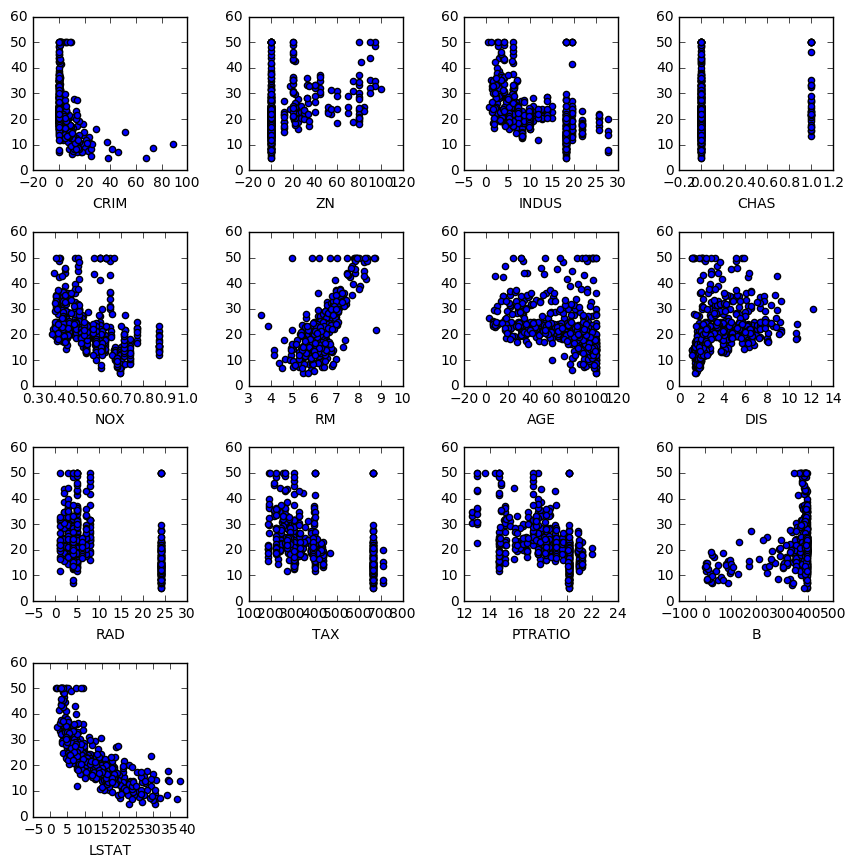

In [3]:
# the relation between each feature and price
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.4)

for i in range(len(boston.feature_names)):
    
    boston_x = boston.data[:, i]
    ax = fig.add_subplot(4, 4, i+1, xlabel=boston.feature_names[i])
    ax.scatter(boston_x, boston.target)

plt.show()

Using scikit-learn to train a linear regression model using the RM feature of the Dataset

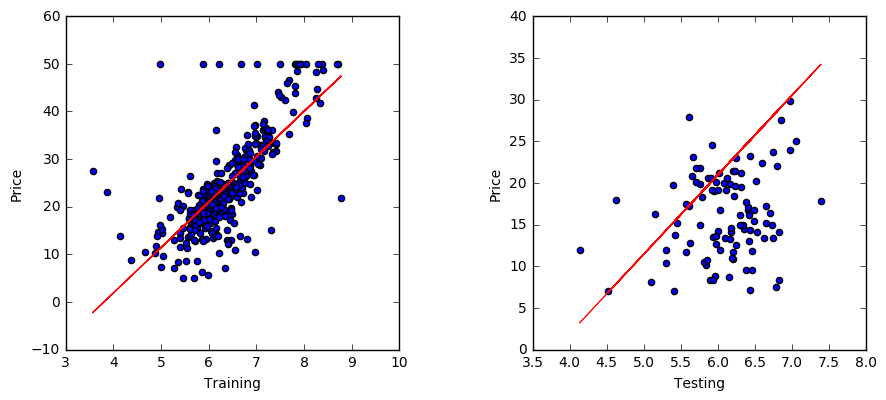

In [4]:
# Use the RM feature
boston_rm = boston.data[:, np.newaxis, 5]

boston_rm_train = boston_rm[:-100] #all but the last 20 records
boston_rm_test = boston_rm[-100:] #the last 20 records

boston_target_train = boston.target[:-100]
boston_target_test = boston.target[-100:]

# Create linear regression object
rm_regr = linear_model.LinearRegression()

# Train the model using the training sets
rm_regr.fit(boston_rm_train, boston_target_train)

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1, xlabel="Training", ylabel="Price")
ax.scatter(boston_rm_train, boston_target_train)
ax.plot(boston_rm_train, rm_regr.predict(boston_rm_train), color='red')

ax = fig.add_subplot(2, 2, 2, xlabel="Testing", ylabel="Price")
ax.scatter(boston_rm_test, boston_target_test)
ax.plot(boston_rm_test, rm_regr.predict(boston_rm_test), color='red')

plt.show()


In [6]:
print(boston_rm.shape)

(506, 1)


Using scikit-learn to train a linear regression model use the RM feature of the Dataset

In [5]:
boston_train = boston.data[:-100] #all but the last 20 records
boston_test = boston.data[-100:] #the last 20 records

boston_target_train = boston.target[:-100]
boston_target_test = boston.target[-100:]

# Create linear regression object
multiregr = linear_model.LinearRegression()
multiregr.fit(boston_train, boston_target_train)

for i in range(len(boston.feature_names)):
    print(boston.feature_names[i], ": ", multiregr.coef_[i])
    
print("Intercept : ", multiregr.intercept_)

CRIM :  -0.191271945138
ZN :  0.0440546272875
INDUS :  0.0520506841131
CHAS :  1.89168396448
NOX :  -14.94008065
RM :  4.7572640012
AGE :  0.00270270874428
DIS :  -1.30022119393
RAD :  0.458902714166
TAX :  -0.0155840407459
PTRATIO :  -0.811094905452
B :  -0.00216355137427
LSTAT :  -0.532320486938
Intercept :  30.2042981442


Create MyLinearRegression implementation

In [6]:
class MyLinearRegression (object):
    
    # initialization
    def __init__(self):
        self.max_iteration = 20
        self.alpha = 0.00001
        self.W = None
        self.b = None
    
    # train a model
    def fit(self, data, target):
        
        assert len(data.shape) == 2
        
        # the number of features
        self.nfeatures = data.shape[1]
        
        # the number of samples
        nsamples = data.shape[0]
        
        # init W and b
        self.W = np.zeros((self.nfeatures,))
        self.b = np.zeros((1,))
        
        # store costs
        costs = np.zeros(self.max_iteration)
        
        # begin to train
        for i in range(self.max_iteration):
            
            errors = self.predict(data) - target
            
            # update self.W
            for j in range(self.nfeatures):
                
                self.W[j] = self.W[j] - self.alpha * np.sum(errors * data[:,j])
            
            # update self.b
            self.b = self.b - self.alpha * np.sum(errors)
                                    
            # end update self.W and self.b
            costs[i] = self.cost(data, target)
        return costs
    
    # calculate costs give data and target
    def cost(self, data, target):
        
        y_pred = self.predict(data)
        inner = (y_pred - target)**2
        return np.sum(inner) / 2
    
    # predict values given data
    def predict(self, data):
        
        return np.dot(data, self.W) + self.b
    

Use MyLinearRegression to train a linear regression model using the RM feature of the Dataset and plot the learning curve

[ 99665.70139443  68157.78557215  48361.13288864  35922.68702734
  28107.4152071   23196.89162084  20111.42637424  18172.6484471
  16954.33615904  16188.69369417  15707.46448013  15404.93262271
  15214.67664348  15094.96381315  15019.57338604  14972.03082245
  14941.98514072  14922.93280126  14910.78761891  14902.98223651]


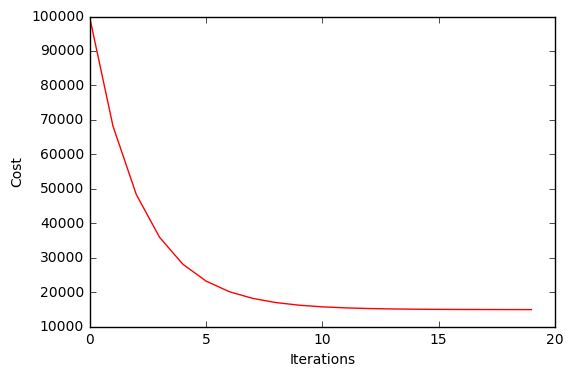

In [7]:
# create a model
mymodel = MyLinearRegression()

costs = mymodel.fit(boston_rm, boston.target)

print(costs)

# plot learning curves
plt.plot(np.arange(len(costs)), costs, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


Compare scikit-learn to MyLinearRegression

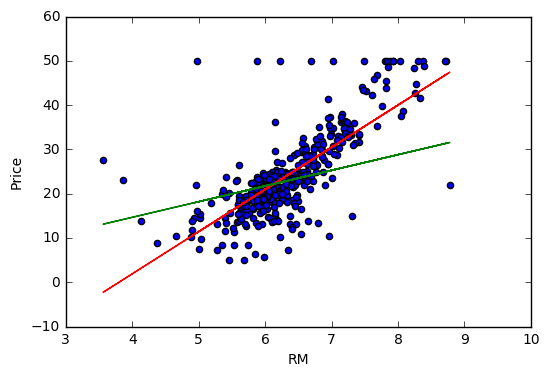

In [8]:
plt.scatter(boston_rm_train, boston_target_train)
plt.plot(boston_rm_train, rm_regr.predict(boston_rm_train), color='red')
plt.plot(boston_rm_train, mymodel.predict(boston_rm_train), color='green')
plt.xlabel(boston.feature_names[5])
plt.ylabel('Price')
plt.show()

Use MyLinearRegression to train a linear regression model on the full dataset

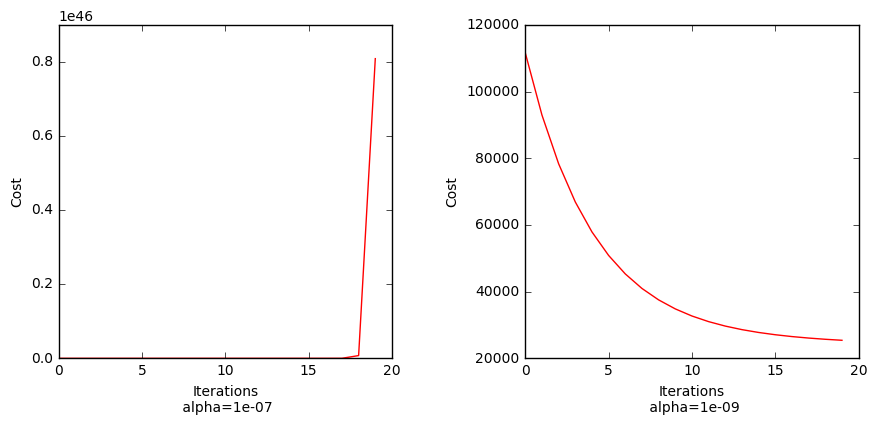

In [9]:
alphas = [0.0000001, 0.000000001]

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.4)

for i in range(len(alphas)):

    mymodel = MyLinearRegression()

    mymodel.max_iteration = 20
    mymodel.alpha = alphas[i]

    costs = mymodel.fit(boston_train, boston_target_train)

    ax = fig.add_subplot(2, 2, i+1, xlabel="Iterations\n alpha="+str(alphas[i]), ylabel="Cost")
    ax.plot(np.arange(len(costs)), costs, 'r')

plt.show()
plt.show()

Update function can be adjusted so it is more efficient. Create MyAdjustedLinearRegression implementation

In [10]:
class MyAdjustedLinearRegression (object):
    
    # initialization
    def __init__(self):
        self.max_iteration = 100
        self.alpha = 0.00001
        self.W = None
        self.b = None
    
    # train a model
    def fit(self, data, target):
        
        assert len(data.shape) == 2
        
        # the number of features
        self.nfeatures = data.shape[1]
        
        # the number of samples
        nsamples = data.shape[0]
        
        # init W and b
        self.W = np.zeros((self.nfeatures,))
        self.b = np.zeros((1,))
        
        # store costs
        costs = np.zeros(self.max_iteration)
        
        # begin to train
        for i in range(self.max_iteration):
            
            errors = self.predict(data) - target
            
            # update self.W
            for j in range(self.nfeatures):
                
                self.W[j] = self.W[j] - self.alpha * np.mean(errors * data[:,j])
            
            # update self.b
            self.b = self.b - self.alpha * np.sum(errors)
                                    
            # end update self.W and self.b
            costs[i] = self.cost(data, target)
        return costs
    
    # calculate costs give data and target
    def cost(self, data, target):
        
        y_pred = self.predict(data)
        inner = (y_pred - target)**2
        return np.mean(inner) / 2
    
    # predict values given data
    def predict(self, data):
        
        return np.dot(data, self.W) + self.b

Using MyAdjustedLinearRegression with the same alphas as before

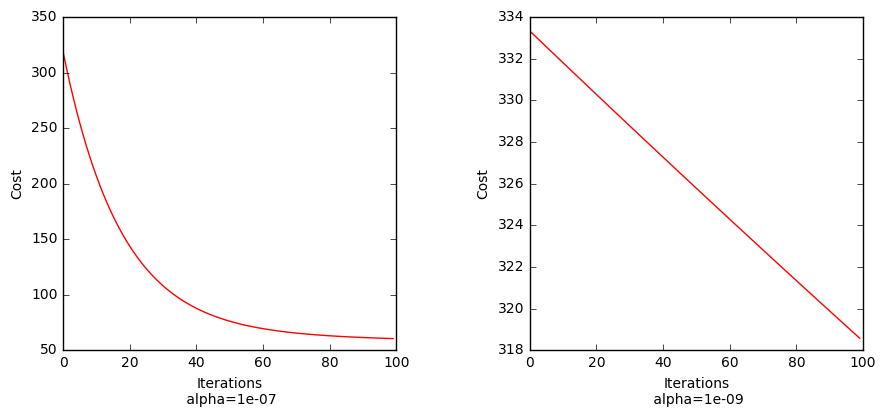

In [11]:
alphas = [0.0000001, 0.000000001]

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.4)

for i in range(len(alphas)):

    myadjustedmodel = MyAdjustedLinearRegression()

    myadjustedmodel.alpha = alphas[i]

    costs = myadjustedmodel.fit(boston_train, boston_target_train)

    ax = fig.add_subplot(2, 2, i+1, xlabel="Iterations\n alpha="+str(alphas[i]), ylabel="Cost")
    ax.plot(np.arange(len(costs)), costs, 'r')

plt.show()

Using MyAdjustedLinearRegression with different alphas to show its effect

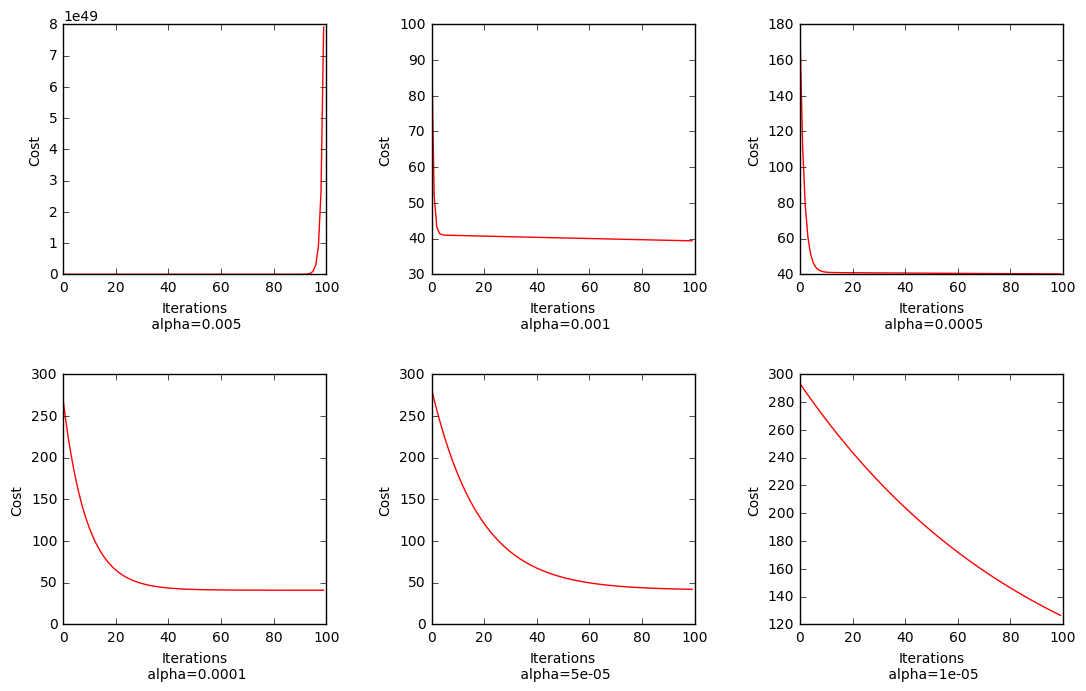

In [12]:
alphas = [0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]

fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.4)

for i in range(len(alphas)):

    myadjustedmodel = MyAdjustedLinearRegression()

    myadjustedmodel.alpha = alphas[i]

    costs = myadjustedmodel.fit(boston_rm, boston.target)

    ax = fig.add_subplot(2, 3, i+1, xlabel="Iterations\n alpha="+str(alphas[i]), ylabel="Cost")
    ax.plot(np.arange(len(costs)), costs, 'r')

plt.show()

Create MyStochasticLinearRegression implementation

In [13]:
class MyStochasticLinearRegression (object):
    
    # initialization
    def __init__(self):
        self.max_iteration = 100
        self.alpha = 0.00001
        self.W = None
        self.b = None
    
    # train a model
    def fit(self, data, target):
        
        assert len(data.shape) == 2
        
        # the number of features
        self.nfeatures = data.shape[1]
        
        # the number of samples
        nsamples = data.shape[0]
        
        # init W and b
        self.W = np.ones((self.nfeatures,))
        self.b = np.zeros((1,))
        
        # store costs
        costs = np.zeros(self.max_iteration)
        
        index = list(range(nsamples)) #need to add list command in python3
        
        # begin to train
        for i in range(self.max_iteration):
            
            shuffle(index)
            
            for idx in range(nsamples):
               
                k = index[idx]
                errors = self.predict(data[k:k+1]) - target[k] #error for one sample
            
                # update self.W
                for j in range(self.nfeatures):
                
                    self.W[j] = self.W[j] - self.alpha * errors * data[k,j]
            
                    # update self.b
                    self.b = self.b - self.alpha * errors
                                    
                    # end update self.W and self.b
            costs[i] = self.cost(data, target)
        
        return costs
    
    # calculate costs give data and target
    def cost(self, data, target):
        
        y_pred = self.predict(data)
        inner = (y_pred - target)**2
        return np.sum(inner) / (2 * len(data))
    
    # predict values given data
    def predict(self, data):
        
        return np.dot(data, self.W) + self.b

Comparing MyStochasticLinearRegression and MyAdjustedLinearRegression

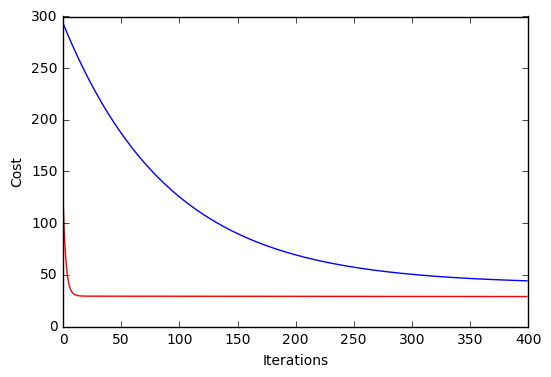

In [14]:

myStochasticModel = MyStochasticLinearRegression()

myStochasticModel.max_iteration = 400
myStochasticModel.alpha = 0.00001
costs = myStochasticModel.fit(boston_rm, boston.target)

# plot learning curves
plt.plot(np.arange(len(costs)), costs, 'r')

# compare it with batch gradient descent
myAdjustedModel = MyAdjustedLinearRegression()

myAdjustedModel.max_iteration = 400
myAdjustedModel.alpha = 0.00001
costs = myAdjustedModel.fit(boston_rm, boston.target)
plt.plot(np.arange(len(costs)), costs, 'b')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Create MyDecayLinearRegression implementation

In [15]:
class MyDecayLinearRegression (object):
    
    # initialization
    def __init__(self):
        self.max_iteration = 100
        self.alpha = 0.00001
        self.W = None
        self.b = None
    
    # train a model
    def fit(self, data, target, decay=True, alpha = 0.1, c=10, max_iteration=100):
        
        assert len(data.shape) == 2
        
        # the number of features
        self.nfeatures = data.shape[1]
        
        # the number of samples
        nsamples = data.shape[0]
        
        # init W and b
        self.W = np.zeros((self.nfeatures,))
        self.b = np.zeros((1,))
        
        # store costs
        costs = np.zeros(self.max_iteration)
        
        alphat = alpha
        
        # begin to train
        for i in range(self.max_iteration):
            
            if decay:
                alphat = alpha * (float(c)/(c+i))
            
            errors = self.predict(data) - target
            
            # update self.W
            for j in range(self.nfeatures):
                
                self.W[j] = self.W[j] - alphat * np.mean(errors * data[:,j])
            
            # update self.b
            self.b = self.b - alphat * np.mean(errors)
                                    
            # end update self.W and self.b
            costs[i] = self.cost(data, target)
        return costs
    
    # calculate costs give data and target
    def cost(self, data, target):
        
        y_pred = self.predict(data)
        inner = (y_pred - target)**2
        return np.mean(inner) / 2
    
    # predict values given data
    def predict(self, data):
        
        return np.dot(data, self.W) + self.b

Allows the Gradient Decent to take larger steps to begin with, reducing as the model approaches the local minimum

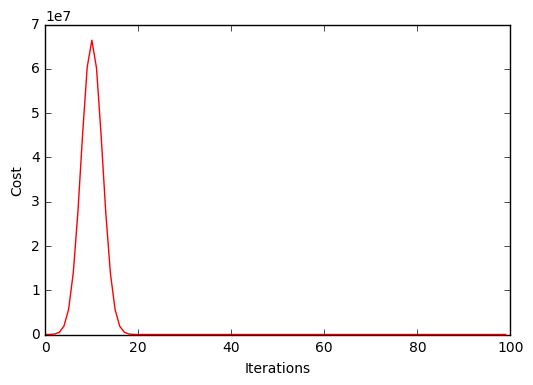

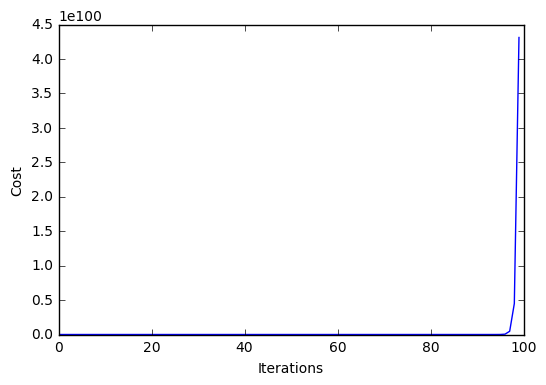

In [16]:
myDecayModel = MyDecayLinearRegression()
costs = myDecayModel.fit(boston_rm, boston.target)

# plot learning curves
plt.plot(np.arange(len(costs)), costs, 'r')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

myNonDecayModel = MyDecayLinearRegression()
costs = myNonDecayModel.fit(boston_rm, boston.target, decay = False)

# plot learning curves
plt.plot(np.arange(len(costs)), costs, 'b')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

If alpha is already small enough the model with weight decay will learn slower

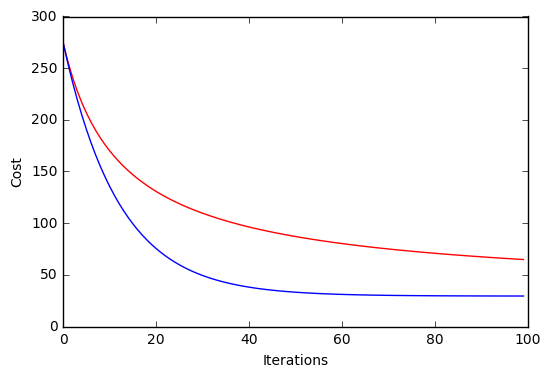

In [17]:
myDecayModel = MyDecayLinearRegression()
costs = myDecayModel.fit(boston_rm, boston.target, alpha = 0.001)

# plot learning curves
plt.plot(np.arange(len(costs)), costs, 'r')

myNonDecayModel = MyDecayLinearRegression()
costs = myNonDecayModel.fit(boston_rm, boston.target, decay = False, alpha = 0.001)

# plot learning curves
plt.plot(np.arange(len(costs)), costs, 'b')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Assessing the impact of varying alphas and decays

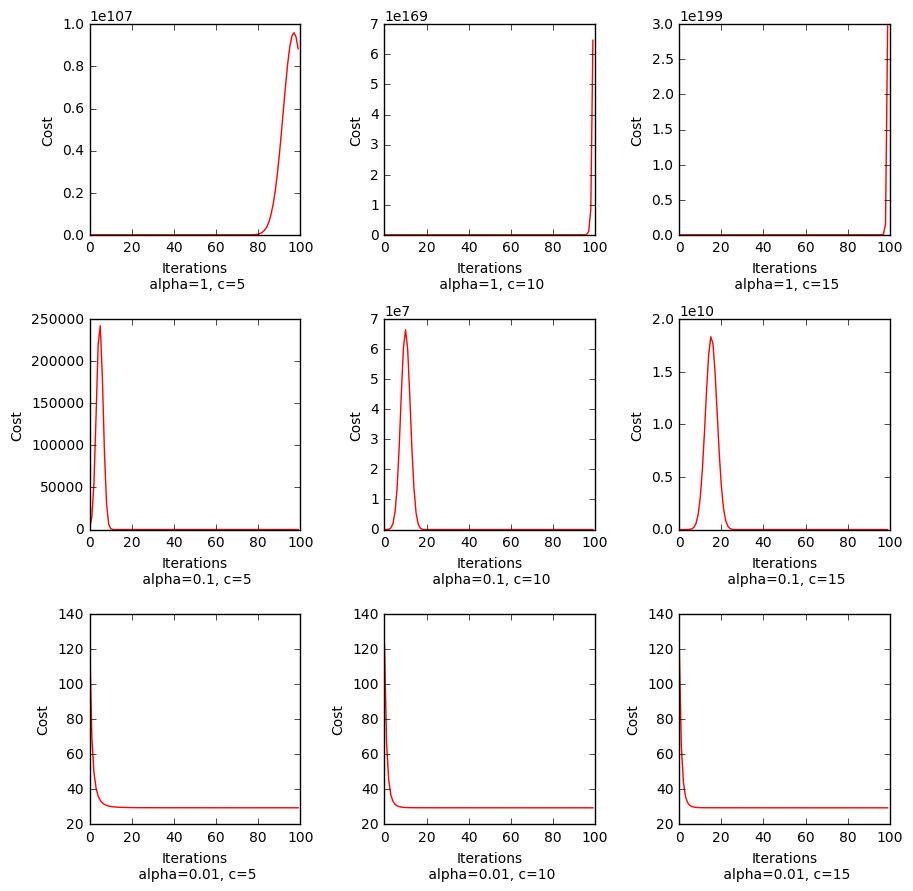

In [18]:
alphas = [1, 0.1, 0.01]
cs = [5, 10, 15]

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.4)

for i, a in enumerate(alphas):  #enumerate is equivalent to range(len(alphas) in python3
    
    for j, c in enumerate(cs):
        
        myDecaymodel = MyDecayLinearRegression()

        costs = myDecaymodel.fit(boston_rm, boston.target, alpha=a, c=c, max_iteration=200)

        ax = fig.add_subplot(len(cs), len(alphas), (i*len(cs))+j+1, 
                             xlabel="Iterations\n alpha="+str(a)+", c="+str(c), ylabel="Cost")
        ax.plot(np.arange(len(costs)), costs, 'r')

plt.show()

Calculate the standard error for the overall model

In [19]:
class MyStatistics (object):
    
    #Calculate the standard error for the overall model
    #inputs: trained model, data and target
    #outputs: the standard error
    def CalcStandardError(self, model, data, target):

        #the number of samples
        m = len(data)
        #predictions 
        hx = model.predict(data)
        #error sum
        err = np.sum((target - hx)**2)
        #standard error
        se = math.sqrt(err*1.0/(m-2))
        return se

    #Calculate the standard error for the jth feature 
    #inputs: the standard error, data and the feature index j
    #output: the jth standard error
    def CalcStandardErrorJ(self, se, data, j):

        #jth feature values
        xj = data[:,j]
        #feature average
        xmean = np.mean(xj)
        #variance
        var = np.sum((xj-xmean)**2)
        #jth standard error
        sej = se / math.sqrt(var)
        return sej

    #Calculate t-statistic for the jth feature
    #input: the jth feature weight thetaj and jth standard error sej
    #output: jth t-stat
    def CalcTstatJ(self, thetaj, sej):

        return thetaj / sej

    #main function, calculate t-stat for all features
    #input: trained model, data and target
    def CalcTstat(self, model, data, target):

        tstats = []
        
        #the number of features
        nfeat = data.shape[1]
        #the whole standard error
        se = self.CalcStandardError(model, data, target)
        #return list
        for j in range(nfeat):

            sej = self.CalcStandardErrorJ(se, data, j)    
            tstatj = self.CalcTstatJ(model.coef_[j], sej)
            tstats.append(tstatj)

        return tstats

In [23]:
print("feature weights:")
print(multiregr.coef_)

Statistics = MyStatistics()

tvalues = Statistics.CalcTstat(multiregr, boston_train, boston_target_train)

print("")
print("t-values:")
print(tvalues)


feature weights
[ -1.91271945e-01   4.40546273e-02   5.20506841e-02   1.89168396e+00
  -1.49400807e+01   4.75726400e+00   2.70270874e-03  -1.30022119e+00
   4.58902714e-01  -1.55840407e-02  -8.11094905e-01  -2.16355137e-03
  -5.32320487e-01]

t-values
[-5.8721539519999189, 4.6923002278999322, 1.4366136696448752, 2.2407394151764541, -7.2277256628959039, 14.676572786849071, 0.33099528549914214, -11.969672907714866, 12.765487781457562, -8.7400151626431466, -7.5897711656544846, -0.36930395092576124, -15.430450708925003]


In [21]:
skmodel = linear_model.LinearRegression()
skmodel.fit(boston.data, boston.target)
skstats = MyStatistics()

sktstats = skstats.CalcTstat(skmodel, boston.data, boston.target)

print(sktstats)

[-4.4156749112964278, 5.1860072906252528, 0.68588516987353787, 3.2728729730841604, -9.8832992479536621, 12.812409510252699, 0.10132628337320884, -14.893598047443207, 12.755535727289619, -9.9591270286148532, -9.8931987146397855, 4.1097348419616884, -17.984301720829581]


In [28]:
pvalues = [stats.t.sf(np.abs(x), len(boston_train) - 1)*2 for x in tvalues]

print("p-values:")
print(pvalues)

indexes = [i for i,x in enumerate(pvalues) if x <= 0.01]

print("")
print("Indexes of features which have significant impact on the model:")
print(indexes)


p-values
[8.9724340288029106e-09, 3.7011762664659853e-06, 0.15159981578416051, 0.025584324803888892, 2.463409880317236e-12, 2.0846056097902404e-39, 0.74081922946363432, 1.7748502553640785e-28, 1.3400141364828925e-31, 6.2599603550799106e-17, 2.2270979968395239e-13, 0.71209418614504216, 1.3973815705994559e-42]

Indexes of features which have significant impact on the model:
[0, 1, 4, 5, 7, 8, 9, 10, 12]
